# Two-qubit dentities

## Import section

In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import StatevectorSimulator, QasmSimulator, UnitarySimulator
import numpy as np
from math import pi

%config InlineBackend.figure_format = 'svg' # Makes the images look nice

## XX evolution

In [8]:
import scipy
from qiskit.quantum_info import Pauli

theta = np.pi/3;
#X = [[0,1],[1,0]];
#XX = np.kron(X,X)
XX = Pauli('XX')
print(np.real(XX.to_matrix()))

Uxx = scipy.linalg.expm(-1j*XX.to_matrix()*theta);

#print(np.kron(X,X))
print(np.round(np.real(Uxx),2))
print(np.round(np.imag(Uxx),2))

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]
[[ 0.    0.    0.   -0.87]
 [ 0.    0.   -0.87  0.  ]
 [ 0.   -0.87  0.    0.  ]
 [-0.87  0.    0.    0.  ]]


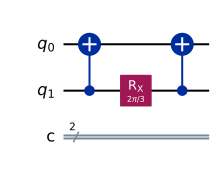

[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]
[[ 0.    0.    0.   -0.87]
 [ 0.    0.   -0.87  0.  ]
 [ 0.   -0.87  0.    0.  ]
 [-0.87  0.    0.    0.  ]]


In [9]:
qc = QuantumCircuit(2,2)

qc.cx(1,0)
qc.rx(theta*2,1)
qc.cx(1,0)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.round(np.real(U),2))
print(np.round(np.imag(U),2))

## YY evolution

In [6]:
YY = Pauli('YY')
print(np.real(YY.to_matrix()))

Uyy = scipy.linalg.expm(-1j*YY.to_matrix()*theta);

#print(np.kron(X,X))
print(np.round(np.real(Uyy),2))
print(np.round(np.imag(Uyy),2))

[[ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [-1.  0.  0.  0.]]
[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]
[[ 0.    0.    0.    0.87]
 [ 0.    0.   -0.87  0.  ]
 [ 0.   -0.87  0.    0.  ]
 [ 0.87  0.    0.    0.  ]]


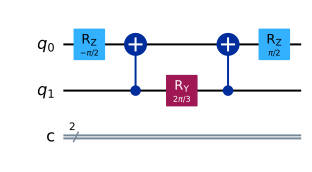

[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]
[[ 0.    0.    0.    0.87]
 [ 0.    0.   -0.87  0.  ]
 [ 0.   -0.87  0.    0.  ]
 [ 0.87  0.    0.    0.  ]]


In [46]:
qc = QuantumCircuit(2,2)

qc.rz(-np.pi/2,0)
#qc.rz(-np.pi/2,1)
qc.cx(1,0)
qc.ry(theta*2,1)
qc.cx(1,0)
qc.rz(np.pi/2,0)
#qc.rz(np.pi/2,1)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.round(np.real(U),2))
print(np.round(np.imag(U),2))

## XX+YY evolution

In [22]:
XX = Pauli('XX')
YY = Pauli('YY')

print(np.real(XX.to_matrix()+YY.to_matrix()))

Uxy = scipy.linalg.expm(-1j*(YY.to_matrix()+XX.to_matrix())*theta);

#print(np.kron(X,X))
print(np.round(np.real(Uxy),2))
print(np.round(np.imag(Uxy),2))

[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]]
[[ 1.   0.   0.   0. ]
 [ 0.  -0.5  0.   0. ]
 [ 0.   0.  -0.5  0. ]
 [ 0.   0.   0.   1. ]]
[[ 0.    0.    0.    0.  ]
 [ 0.    0.   -0.87  0.  ]
 [ 0.   -0.87  0.    0.  ]
 [ 0.    0.    0.    0.  ]]


In [30]:
print( np.dot(XX.to_matrix(),YY.to_matrix()) - np.dot(YY.to_matrix(),XX.to_matrix()) )

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


### $[X_1X_2,Y_1Y_2]=0$

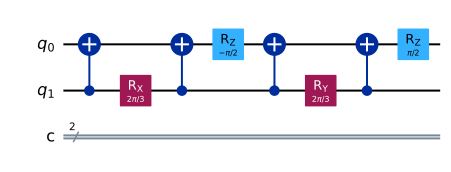

[[ 1.   0.   0.   0. ]
 [ 0.  -0.5  0.   0. ]
 [ 0.   0.  -0.5  0. ]
 [ 0.   0.   0.   1. ]]
[[ 0.    0.    0.   -0.  ]
 [ 0.    0.   -0.87  0.  ]
 [ 0.   -0.87  0.    0.  ]
 [-0.    0.    0.    0.  ]]


In [31]:
qc = QuantumCircuit(2,2)

qc.cx(1,0)
qc.rx(theta*2,1)
qc.cx(1,0)
qc.rz(-np.pi/2,0)
qc.cx(1,0)
qc.ry(theta*2,1)
qc.cx(1,0)
qc.rz(np.pi/2,0)


display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.round(np.real(U),2))
print(np.round(np.imag(U),2))

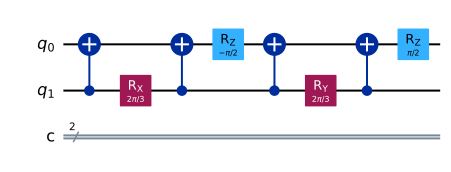

In [38]:
from qiskit import compiler

qc2 = compiler.transpile(qc,optimization_level=2)

qc2.draw('mpl')

## ZZ evolution

In [39]:
ZZ = Pauli('ZZ')
print(np.real(ZZ.to_matrix()))

Uzz = scipy.linalg.expm(-1j*ZZ.to_matrix()*theta);

#print(np.kron(X,X))
print(np.round(np.real(Uzz),2))
print(np.round(np.imag(Uzz),2))

[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]]
[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]
[[-0.87  0.    0.    0.  ]
 [ 0.    0.87  0.    0.  ]
 [ 0.    0.    0.87  0.  ]
 [ 0.    0.    0.   -0.87]]


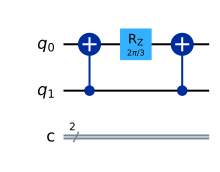

[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]
[[-0.87  0.    0.    0.  ]
 [ 0.    0.87  0.    0.  ]
 [ 0.    0.    0.87  0.  ]
 [ 0.    0.    0.   -0.87]]


In [41]:
qc = QuantumCircuit(2,2)

qc.cx(1,0)
qc.rz(theta*2,0)
qc.cx(1,0)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.round(np.real(U),2))
print(np.round(np.imag(U),2))

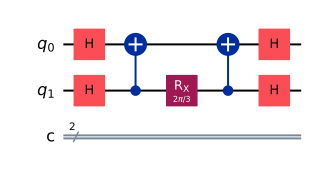

[[ 0.5 -0.  -0.   0. ]
 [ 0.   0.5  0.   0. ]
 [ 0.   0.   0.5  0. ]
 [-0.  -0.  -0.   0.5]]
[[-0.87 -0.    0.    0.  ]
 [-0.    0.87 -0.    0.  ]
 [ 0.   -0.    0.87 -0.  ]
 [ 0.    0.   -0.   -0.87]]


In [43]:
qc = QuantumCircuit(2,2)

qc.h(0)
qc.h(1)
qc.cx(1,0)
qc.rx(theta*2,1)
qc.cx(1,0)
qc.h(0)
qc.h(1)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.round(np.real(U),2))
print(np.round(np.imag(U),2))

In [47]:
print( np.dot(XX.to_matrix(),ZZ.to_matrix()) - np.dot(ZZ.to_matrix(),XX.to_matrix()) )

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


### $[X_1X_2,Z_1Z_2]=0$

## Heisenberg (XX+YY+ZZ) evolution

In [115]:
XX = Pauli('XX')
YY = Pauli('YY')
ZZ = Pauli('ZZ')

Heis = XX.to_matrix()+YY.to_matrix()+ZZ.to_matrix();
print(np.real( Heis ))

Uheis = scipy.linalg.expm(-1j*Heis*theta);

#print(np.kron(X,X))
print(np.round(np.real(Uheis),2))
print(np.round(np.imag(Uheis),2))

[[ 1.  0.  0.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  2. -1.  0.]
 [ 0.  0.  0.  1.]]
[[ 0.5   0.    0.    0.  ]
 [ 0.   -0.25  0.75  0.  ]
 [ 0.    0.75 -0.25  0.  ]
 [ 0.    0.    0.    0.5 ]]
[[-0.87  0.    0.    0.  ]
 [ 0.   -0.43 -0.43  0.  ]
 [ 0.   -0.43 -0.43  0.  ]
 [ 0.    0.    0.   -0.87]]


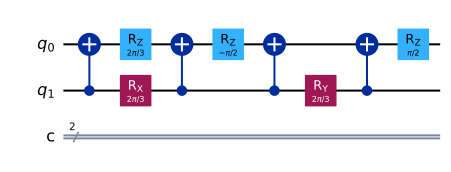

[[ 0.5   0.    0.    0.  ]
 [ 0.   -0.25  0.75  0.  ]
 [ 0.    0.75 -0.25  0.  ]
 [ 0.    0.    0.    0.5 ]]
[[-0.87  0.    0.   -0.  ]
 [ 0.   -0.43 -0.43  0.  ]
 [ 0.   -0.43 -0.43  0.  ]
 [-0.    0.    0.   -0.87]]


In [70]:
qc = QuantumCircuit(2,2)

qc.cx(1,0)
qc.rz(theta*2,0)
#qc.cx(1,0)

#qc.cx(1,0)
qc.rx(theta*2,1)
qc.cx(1,0)

qc.rz(-np.pi/2,0)
qc.cx(1,0)
qc.ry(theta*2,1)
qc.cx(1,0)
qc.rz(np.pi/2,0)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()

print(np.round(np.real(U),2))
print(np.round(np.imag(U),2))

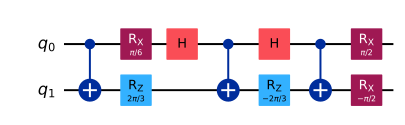

[[ 0.5  -0.    0.    0.  ]
 [-0.   -0.25  0.75 -0.  ]
 [ 0.    0.75 -0.25  0.  ]
 [-0.    0.    0.    0.5 ]]
[[-0.87 -0.    0.    0.  ]
 [-0.   -0.43 -0.43  0.  ]
 [-0.   -0.43 -0.43  0.  ]
 [ 0.   -0.    0.   -0.87]]
[[ 0.5 -0.87j -0.  -0.j    0.  +0.j    0.  +0.j  ]
 [-0.  -0.j   -0.25-0.43j  0.75-0.43j -0.  +0.j  ]
 [ 0.  -0.j    0.75-0.43j -0.25-0.43j  0.  +0.j  ]
 [-0.  +0.j    0.  -0.j    0.  +0.j    0.5 -0.87j]]


In [151]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
qc = QuantumCircuit(qreg_q)

q0=0
q1=1
theta = np.pi*4/3

qc.cx(q0, q1)
qc.rx(theta/2-np.pi/2, q0)
qc.h(q0)
qc.rz(theta/2, q1)
qc.cx(q0, q1) 
qc.h(q0)
qc.rz(-theta/2, q1)
qc.cx(q0,q1)
qc.rx(np.pi/2, q0)
qc.rx(-np.pi/2, q1)

display(qc.draw('mpl'))

unitary_simulator = UnitarySimulator() 
U = unitary_simulator.run(qc).result().get_unitary()*np.exp(-1j*np.pi*3/12 )

print(np.round(np.real(U),2))
print(np.round(np.imag(U),2))

print(np.round(U,2))